# G.G, Good Game! Investigating the Structural Characteristics that Make Highly-Rated Video Games

# Notebook 2 - EDA & Distribution
**Exploring the data**

&nbsp;

**By: [Lae Rivera](https://github.com/laerivera)**

**BrainStation Data Science**

**April 4, 2022**


In this portion of the workbook, I will be doing some exploratory data analysis to gather some both useful and interesting insights about my dataset. Furthermore, I will plot the distribution of the data to support my findings and understanding. 

A quick sumamry of EDA findings is denoted at the end of the workbook.

***

## Notebook Contents

1. [**Exploratory Data Analysis**](#b1)<br>
    1.1 [Name](#b1.1)<br>
    1.2 [Platform](#b1.2)<br>
    1.3 [Meta Score](#b1.3)<br>
    1.4 [User Review](#b1.4)<br>
    1.5 [Release Year](#b1.5)<br>
    1.6 [Release Month](#b1.6)<br>
    
    
2. [**EDA Summary**](#b2)<br>

***

**Importing Libraries**

In [1]:
# Importing libraries

# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load data
games_df = joblib.load('data/games_df.pkl')

***

# Exploratory Data Analysis and Distributions <a id="b1"></a>

In [3]:
# List of columns to work on
list(games_df.columns)

['name',
 'platform',
 'summary',
 'meta_score',
 'user_review',
 'release_year',
 'release_month']

***

## Distribution: Name <a id="b1.1"></a>

In [4]:
# Count how many unique Titles
print(f"Number of Unique Titles: {len(list(games_df['name'].unique()))}")

Number of Unique Titles: 11320


The dataset collected has 11,320 unique game titles (names). This would make sense since the data was scraped from the year 2005 until 2021. With hundreds of games released each year, I am not surprised there are plenty of games in this dataset.

**Name Distribution Plot**

With over 11,000+ different game names, it would be difficult to interpret all of them when plotted on a graph. I am only going to focus on the **Top 20 Games by Number of Reviews**.

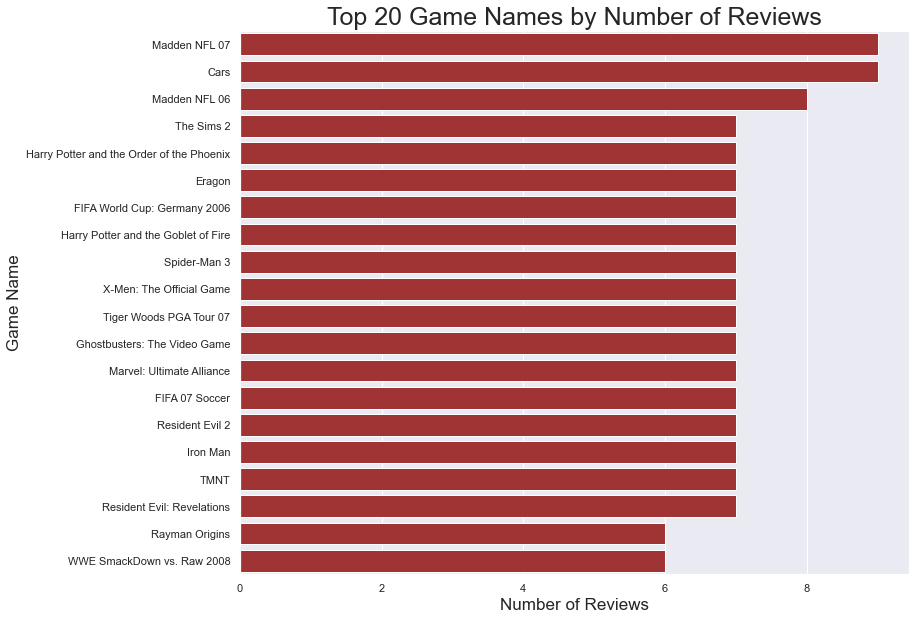

In [5]:
# Plot Figure
plt.figure(figsize=(12,10))

sns.set_theme(style="darkgrid") # set theme
ax = sns.countplot(y="name", 
                   data=games_df, 
                   orient='h', #horizontal bar
                   order=games_df.name.value_counts().iloc[:20].index, # top 20 by ordered by count
                   color='firebrick') 

# Modify Axes
ax.set_title("Top 20 Game Names by Number of Reviews", fontsize=25)
ax.set_xlabel("Number of Reviews", fontsize = 17)
ax.set_ylabel("Game Name", fontsize = 17)
ax.tick_params(axis='x')
plt.savefig('data/edaname.jpg')
plt.show()

From the graph above, I can see that `Madden NFL 07` and `Cars` are the game with the highest number reviews. 

Furthermore, I noticed that the games with the most number of reviews have a 'year' or 'number' right after the main title of the game. To me this indicates that these games are part of a *franchise*. For instance, the *'Madden NFL'* franchise title appears multiple times in the graph, as does *'Harry Potter'* and *'FIFA'*. 

I also noticed that the games that are most reviewed seemed to be released during the mid-2000s (as indicated by the year). It is possible that this is due to a larger variety of platforms being present at that time frame, and thus there are more reviews for each platform the game is on. In more recent years, platforms have reduced to the 4 most popular: PC, Play Station 5, Xbox Series X, Nintendo Switch as opposed to having more years ago.

***

## Distribution: Platform <a id="b1.2"></a>

In [6]:
# Count how many unique platforms
print(f"Number of Unique Platforms: {len(list(games_df['platform'].unique()))}")

Number of Unique Platforms: 22


There are 22 unique platforms in this dataset.

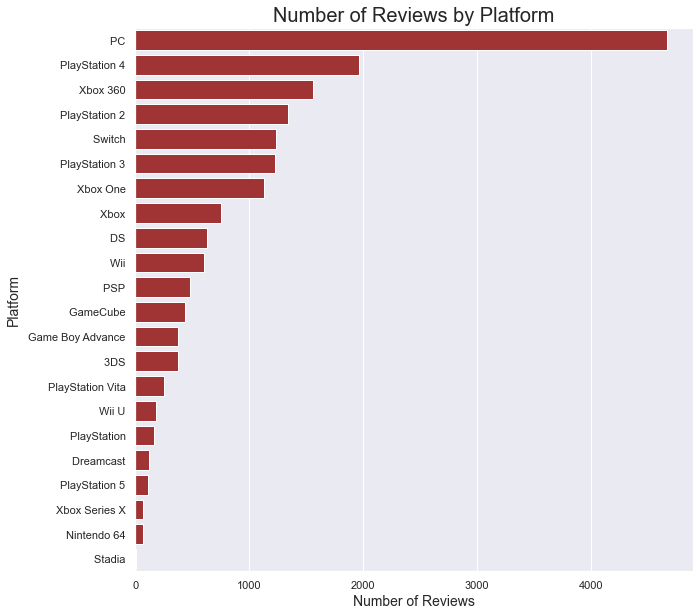

In [7]:
# Plot Figure
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid") #set theme

ax = sns.countplot(y="platform", 
                   data=games_df,
                   orient='h', #set horizontal
                   order=games_df['platform'].value_counts().index,
                   color='firebrick')
# edit labels
ax.set_title("Number of Reviews by Platform", fontsize=20)
ax.set_xlabel("Number of Reviews", fontsize = 14)
ax.set_ylabel("Platform", fontsize = 14)
plt.savefig('data/edaplatform.jpg') #save file
plt.show()

PC is the highest reviewed platform. This is nearly 3 times the size of the following platforms (PlayStation4 and XBOX 360). It is possible this is because there are many generations of other platforms while PC remains a consistent platform throughout the years. For example, Playstation has had 5 generations so far, each releasing games for only a few years until the preceding console gets released (PS1, PS2 ,PS3, PS4, and PS5). Additionally, it seems like there are more reviews on newer platforms as opposed to older ones. This could be due to the amount of games being developed at a faster rate, and thus more reviews coming in. 

***

## Distribution: Meta Score <a id="b1.3"></a>

In [8]:
# Summary Statistics
print(" Summary Statistics: Meta Score")
games_df['meta_score'].describe()

 Summary Statistics: Meta Score


count    17776.000000
mean        71.027171
std         12.232221
min         20.000000
25%         64.000000
50%         73.000000
75%         80.000000
max         99.000000
Name: meta_score, dtype: float64

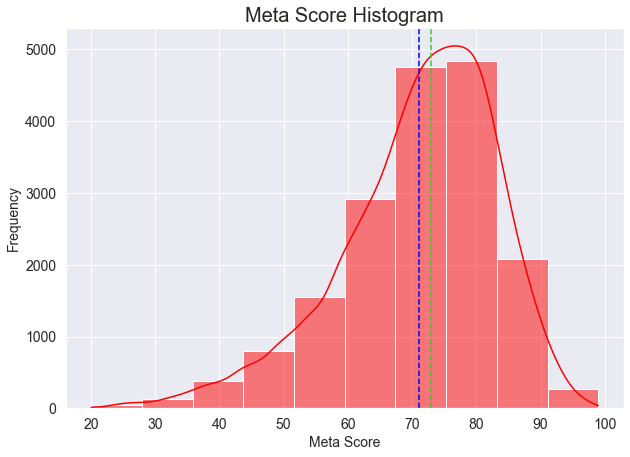

In [9]:
# Plot figure
plt.figure(figsize=(10, 7))

sns.histplot(data=games_df, 
             x="meta_score", 
             bins=10, 
             kde=True, #show distribution line
             color='red')
# Lines
plt.axvline((games_df['meta_score'].mean()), color='blue', linestyle='--') # Mean Line
plt.axvline((games_df['meta_score'].median()), color='limegreen', linestyle='--') # Median Line

# Plot titles and labels
plt.title('Meta Score Histogram', fontsize=20)
plt.xlabel('Meta Score', fontsize=14)   
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('data/edametascore.jpg') #save file
plt.show()

Looking at Meta Score, the distribution looks to be slightly skewed to the left, with its tail forming to the left. The average Meta Score is around ~71, which is denoted by the blue dashed line. This average is more on the high side as scores range from 0 to 100. The median Meta Score can be found to the right of it, as denoted by the green line at around 73. 

Although slightly skewed, I believe this score is still usable for my analysis as it has some semblence of normality as denoted by the kernel density estimate (kde) line.

***

## Distribution: User Review <a id="b1.4"></a>

In [10]:
# Summary Statistics
games_df['user_review'].describe()

count    17776.000000
mean         6.984419
std          1.351042
min          0.200000
25%          6.300000
50%          7.300000
75%          7.900000
max          9.700000
Name: user_review, dtype: float64

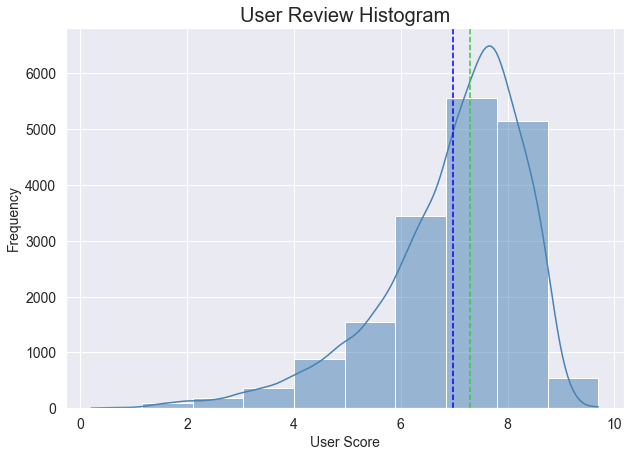

In [11]:
# Plot figure
plt.figure(figsize=(10, 7))
sns.histplot(data=games_df, x="user_review", bins=10, kde=True, color='steelblue')

# Add lines
plt.axvline((games_df['user_review'].mean()), color='blue', linestyle='--')
plt.axvline((games_df['user_review'].median()), color='limegreen', linestyle='--')

# Set labels
plt.title('User Review Histogram', fontsize=20)
plt.xlabel('User Score', fontsize=14)   
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('data/edauserreview.jpg') #save file
plt.show()

The user review histogram shows us that user_reviews distribution is skewed to the left, with its tail forming to the left. The average User Review score is a 6.98 (denoted by the blue dashed line), with a median of 7.3 (denoted by the green dashed line). The histogram shows that the scores given by users tend to be "higher" since the user score is a value between 0-10. 

## Distribution: Release Year <a id="b1.5"></a>

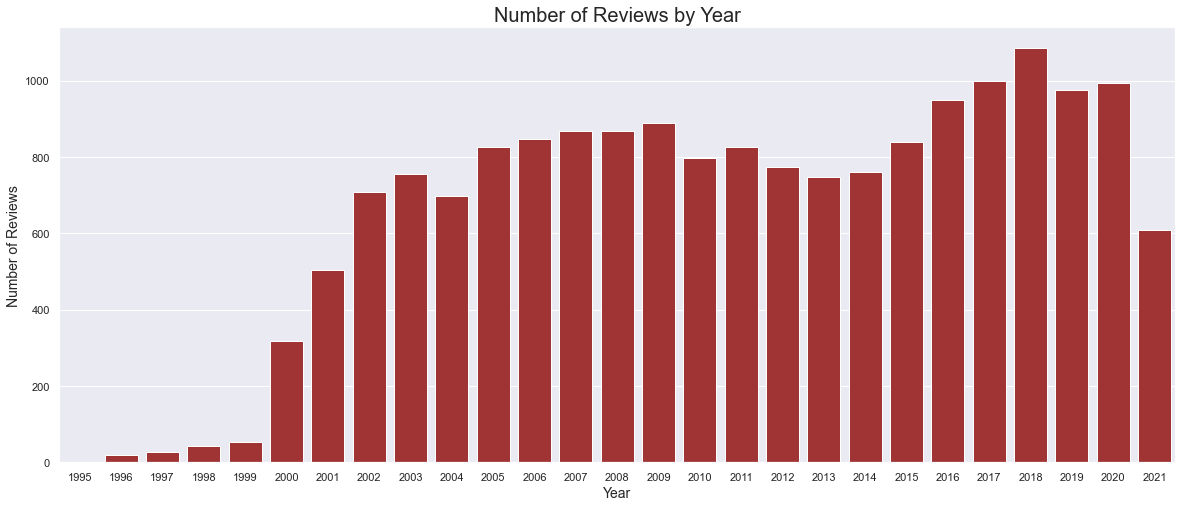

In [12]:
# plot figure
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="release_year", data=games_df, color='firebrick')

# Edit labels
ax.set_title("Number of Reviews by Year", fontsize=20)
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("Number of Reviews", fontsize = 14)
ax.tick_params(axis='x')

plt.savefig('data/edareleaseyear.jpg') #save file
plt.show()

From 1995 to 1999, the number of reviews were at an all-time low. However, there was a surge in reviews by 2000. It is possible that since Metacritic was launched in this [year](https://en.wikipedia.org/wiki/Metacritic), and the website was experiencing a growth in popularity, and thus more reviews done. On a decade-to-decade basis, there seems to be two different peaks occuring. From 2000-2010, the number of reviews peaked at around 2009. From 2010 to 2021, the peak in numbers of reviews happened in 2018—which was also saw the highest number of reviews of all time. 

In 2021 (the most recent year reviewed), reviews seemed to drop drastically from the previous year. It is possible that this is due to the delays in game releases due to COVID-19.


Looking at the distribution of year as a whole, it looks like more reviews have come in in more recent years compared to earlier years.

*Note*: I am using "number of reviews" over "number of game releases" since the same game can be released on multiple different platforms, but the score/review given are unique. The score is my focus.

***

## Distribution: Release Month <a id="b1.6"></a>

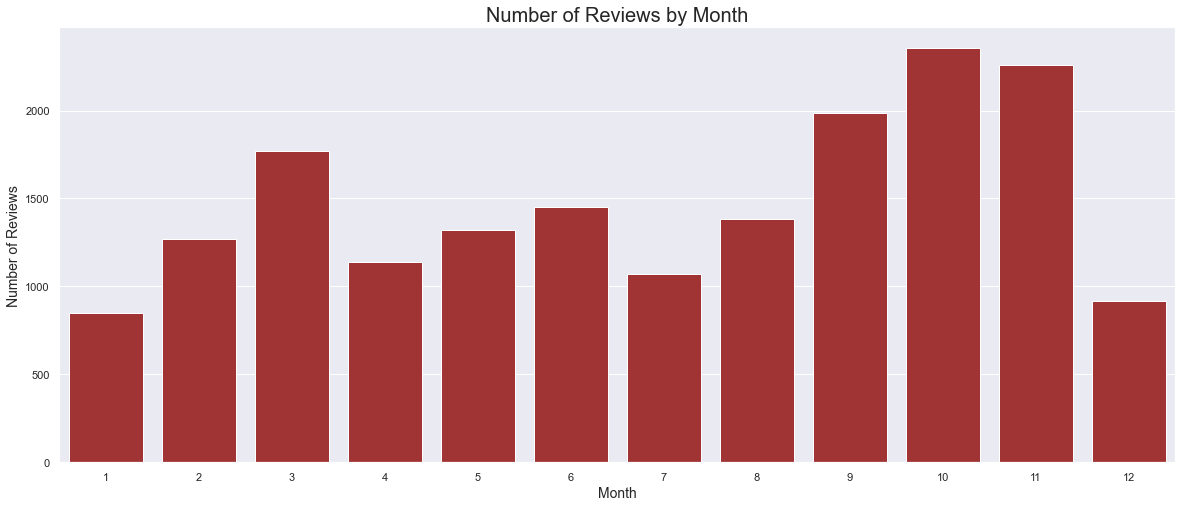

In [13]:
# Plot figure
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="release_month", data=games_df, color='firebrick')

# Add labels
ax.set_title("Number of Reviews by Month", fontsize=20)
ax.set_xlabel("Month", fontsize = 14)
ax.set_ylabel("Number of Reviews", fontsize = 14)
ax.tick_params(axis='x')

plt.savefig('data/edareleasemonth.jpg')
plt.show()

Looking at the release month distribution, the distribution looks bimodal. There are review peaks in November, and a smaller one in March. It is possible that this can be seasonal and in line as to when games are released. 

*Note*: I am using "number of reviews" over "number of game releases" since the same game can be released on different platforms, but the score/review given are unique. The score is my focus.

***

# EDA and Distribution Summary <a id="b2"></a>

**Name**:
- Madden NFL 07 and Cars are the most reviewed games
- Franchises tend to have more reviews
- Games from the early 2000’s have more reviews

**Platform**:
- PC is the highest reviewed platform
- There are different generations of consoles, which broadens out the distribution of the base platform (5 generations of PlayStation)
- Newer platforms have more reviews than older ones.

**Meta Score**:
- Scores tend to be 'high'
- Average of ~71
- Looks slightly skewed but is normally distributed

**User Review**:
- Scores tend to be 'high'
- Average of 6.98 out of 10
- Skewed to the left


**Release Year**:
- More reviews in more recent years as opposed to earlier years
- 2018 had the most reviews
- Drop in reviews in 2021
- On a decade-to-decade basis, there are 2 peaks: 2009 and 2018 respectively. 

**Release Month**:
- 2 peaks: November and a smaller one in March 
- Possible seasonal aspect

***

**Notebook Ending Remarks**

In the next notebook, I will be going through some more cleaning and pre-processing steps. See Notebook *3-Pre-Processing*.

***